<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_ID         1000 non-null   int64  
 1   Base_Price         1000 non-null   float64
 2   Competitor_Price   1000 non-null   float64
 3   Customer_Rating    1000 non-null   float64
 4   Demand_Elasticity  1000 non-null   float64
 5   Seasonality        1000 non-null   int64  
 6   Marketing_Spend    1000 non-null   float64
 7   Sales_Volume       1000 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 62.6 KB
None
        Product_ID   Base_Price  Competitor_Price  Customer_Rating  \
count  1000.000000  1000.000000        1000.00000      1000.000000   
mean    500.500000    59.220560          59.71495         2.972100   
std     288.819436    23.371094          23.66615         1.155971   
min       1.000000    20.370000          10.69000         1.000000   
25%     2

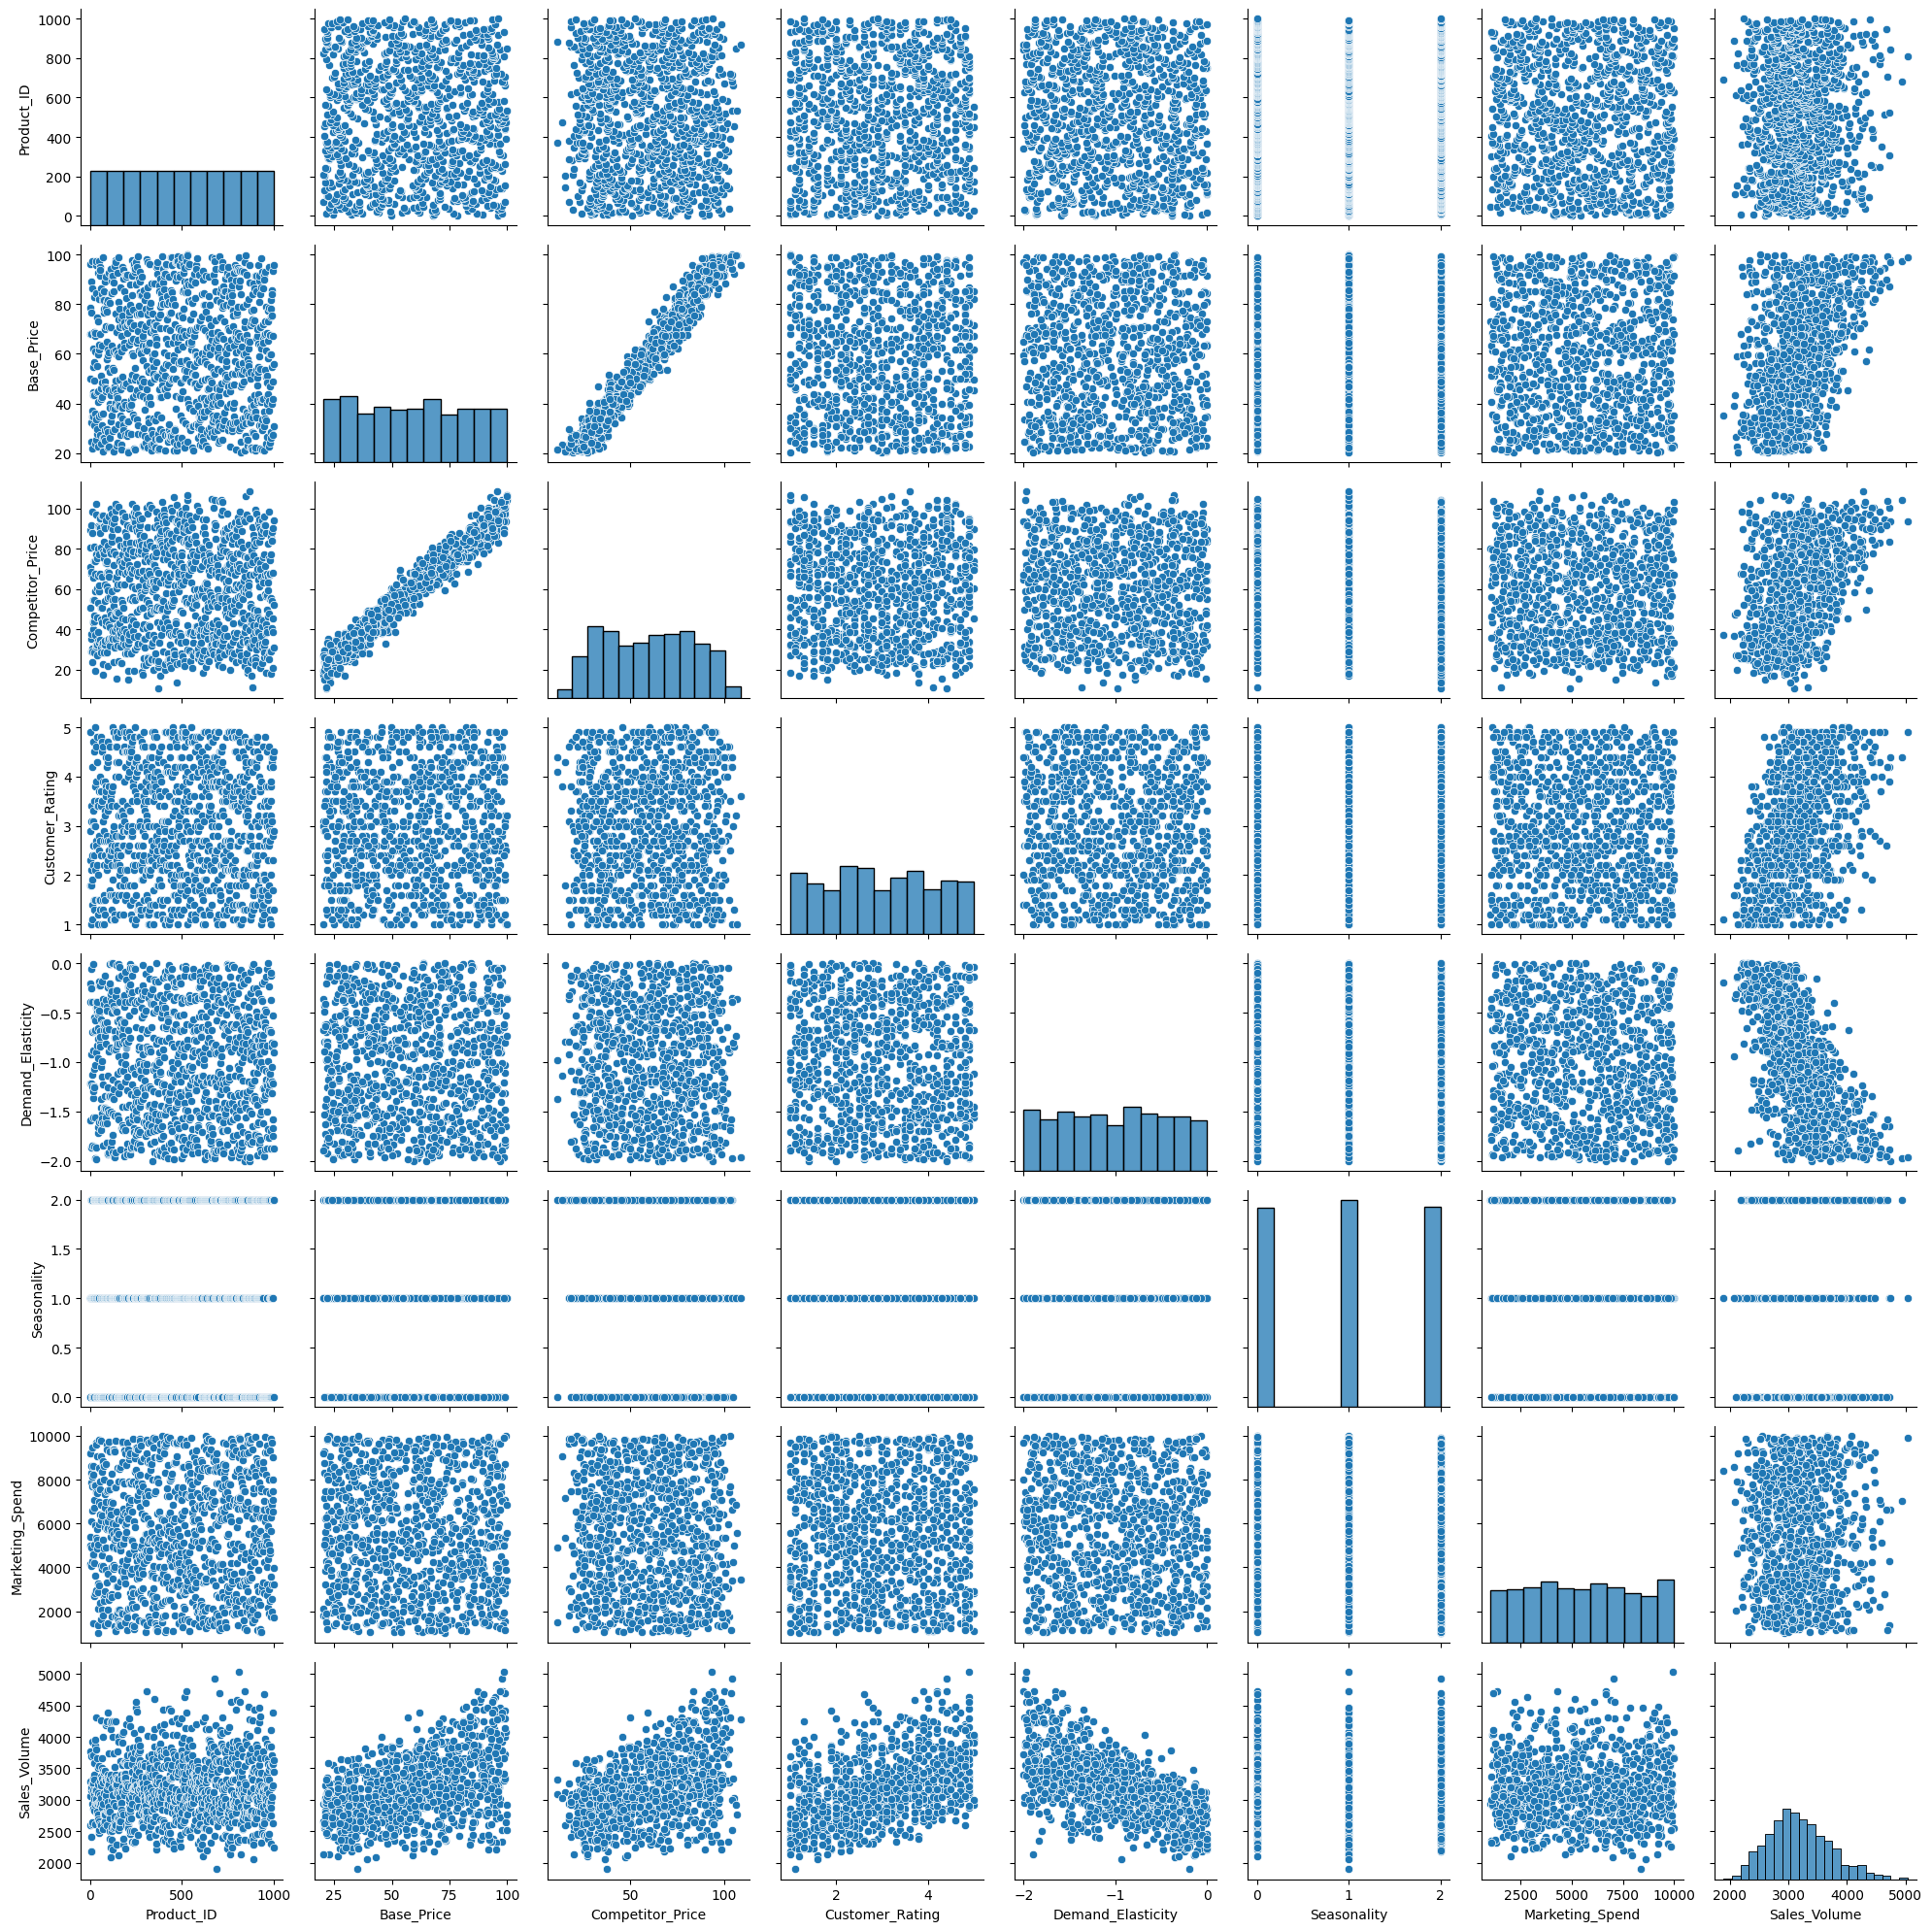

['Base_Price', 'Competitor_Price', 'Customer_Rating', 'Demand_Elasticity', 'Seasonality', 'Marketing_Spend']
MSE: 54447.14, R2 Score: 0.83


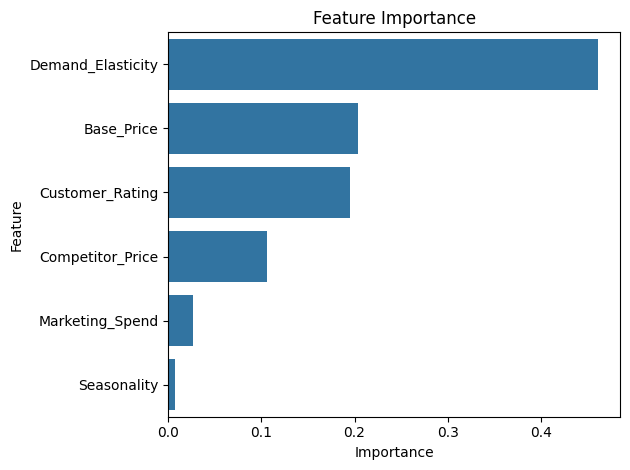

Project notebook completed and ready for GitHub and AWS deployment.


In [17]:
# Bosch Pricing Optimization Final Project Notebook

# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# 2. Load the Bosch pricing optimization dataset
file_path = r"C:\Users\LOVE UMB\Desktop\NexFord Uni\Ban6800\Project\bosch_pricing_optimization_dataset.csv"
bosch_df = pd.read_csv(file_path)

# Display the first few rows to confirm
bosch_df.head()

# 3. Exploratory Data Analysis
print(df.info())
print(df.describe())
print(df.isnull().sum())
sns.pairplot(df)
plt.tight_layout()
plt.show()

# 4. Data Preprocessing
# Encode Seasonality
le = LabelEncoder()
df['Seasonality'] = le.fit_transform(df['Seasonality'])  # High=0, Low=1 (or vice versa)

# Features and Target
X = df.drop(['Sales_Volume', 'Product_ID'], axis=1)
print(X.columns.tolist())
y = df['Sales_Volume']

# 5. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. Model Building
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R2 Score: {r2:.2f}")

# 9. Save the Model and Scaler
joblib.dump(model, 'pricing_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# 10. Save Cleaned Dataset
df.to_csv('bosch_pricing_optimization_clean.csv', index=False)

# 11. Feature Importance
feature_names = X.columns
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# 12. (For Deployment) Sample Flask API Template
flask_code = '''
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('pricing_model.pkl')
scaler = joblib.load('scaler.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = np.array([list(data.values())])
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)
    return jsonify({'predicted_sales_volume': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)
'''

with open("app.py", "w") as f:
    f.write(flask_code)

print("Project notebook completed and ready for GitHub and AWS deployment.")


In [13]:
!pip freeze > requirements.txt
